# 1 - Introduction

Dans cette article, nous allons voir comment faire du clustering avec DBSCAN (density-based spatial clustering of applications with noise).
D'abord, nous allons expliquer le clustering en repondant à ces deux questions : c'est quoi ? quels sont les les criteres qu'il doit satisfaire ?
Ensuite, nous allons nous concentré sur DBSCAN pour le decouvrir et voire son fonctionnement.
Pour Terminer, on feras un petit TP sur DBSCAN.

# 2 - Clustering :
## 2.1 - Definition : 

D'aprés wikipedia, Le clustering est une méthode en analyse des données. Elle vise à diviser un ensemble de données en différents « paquets » homogènes, en ce sens que les données de chaque sous-ensemble partagent des caractéristiques communes, qui correspondent le plus souvent à des critères de proximité (similarité informatique) que l'on définit en introduisant des mesures et classes de distance entre objets.

Les algorithmes de clustering font partie de la classe des algorithmes d'apprentissages non supervisés. Il existe différents algorithmes de clustering parmis lesquels on peut citer  : le clustering hiérarchique, K-means, et DBSCAN.
Dans cette Article nous n'allons aborder que DBSCAN.

La ficure ci-dessous montre des données qui été divisé en 5 clusters par un algorith de clustering.

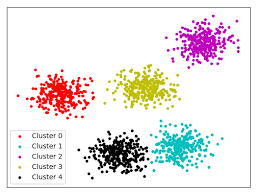

## 2.2 - Criteres que doit satisfaire un clustering

Dans le cas d'algorithmes non supervisés, les criteres que doit satisfaire l'algorithme sont moins évident à définir que dans le cas d'algorithmes supervisés, où il y a une tâche claire à accomplir. Ceci n'empêche pas qu'il existe des mesures de la performance d'un algorithme non supervisé : 

### a - Distances et similarités : 

Faire un clustering, c'est regrouper ensemble les points les plus proches, ou les plus semblables. Le concept de clustering repose fortement sur ceux de distance et de similarité. Ces concepts sont très utiles pour définir à quel point deux éléments sont proches les unes des autres ; à quel point un élément est proche d'un cluster ; et à quel point deux clusters sont proches les uns des autres.

Les exemples les plus utilisés de distances sont la distance euclidienne et la distance de Manhattan.

### b - Forme des clusters

Nous voulons de nos clusters qu'ils soient : 
  #### - resserrés sur eux mêmes (deux points qui sont proches doivent appartenir au même cluster) : 
  On appelle centroïde d'un cluster le barycentre des points de ce cluster : 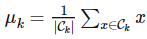 
  
  La figure ci-dessous montre quatre clusters avec leurs centroïde (en noire)
  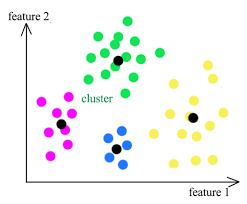
  
  On définit ainsi l'homogénéité (notée Tk pour tightness en anglais) d'un cluster comme la moyenne des distances de chacun des points contenus dans ce cluster au centroïde   μk: 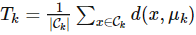
  
  Un cluster resserré aura une hétérogénéité plus faible qu'un cluster de points épars.

Pour caractériser non pas un cluster, mais l'ensemble des clusters, on peut calculer la moyenne des homogénéités de chaque cluster.
  
  #### - loin les uns des autres (deux points qui sont éloignés doivent appartenir à des clusters différents) : 
  Pour quantifier le fait que deux clusters soient loin l'un de l'autre, on définit la séparation de deux clusters comme la distance entre leurs centroïdes : 
  
  On peut calculer la moyenne de ces quantités sur l'ensemble des paires de cluster (k,l) obtenues :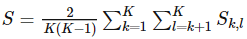
  
  
### c - Indice de Davies-Bouldin : 
Nous avons maintenant deux critères à optimiser : les distannce intra-cluster (c'est l'homogénéité), que l'on veut faibles, aux distances inter-cluster (la séparation), que l'on veut grandes.
L'idée de cette indice est de comparer ces deux critères.

Pour un cluster k, cet indice est donné par : 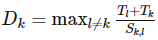

cet indice est d'autant plus faible que tous les clusters sont homogènes (le numérateur de cette fraction est petit) et que tous sont bien séparés (le dénominateur est grand). On peut calculer cet indice de maniere global en moyennant les indices de Davies-Bouldin de tous les clusters.

### d - coefficient de silhouette : 
L'autre moyen de quantifier à quel point un clustering répond à ces deux exigences (homogénéité et séparation) est de mesurer  le coefficient de silhouette.

Pour un point x donné, le coefficient de silhouette s(x) permet d'évaluer si ce point appartient au « bon » cluster : 

###### -- x est-il proche des points du cluster auquel il appartient ?
pour repondre à cette question, on calcule la distance moyenne de x à tous les autres points du cluster C_k auquel il appartient : 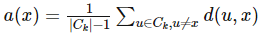
###### -- x Est-il loin des autres points ?
pour repondre à cette question, on calcule la plus petite valeur que pourrait prendre a(x), si x était assigné à un autre cluster : 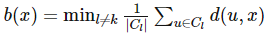



Le coefficient de silhouette est donné par : 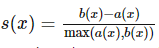

Il est donc compris entre -1 et 1, et d'autant plus proche de 1 que l'assignation de x à son cluster est satisfaisante. 

Pour évaluer un clustering, on peut calculer son coefficient de silhouette moyen.

# 3 - DBSCAN : 
## 3.1 - Définition : 

DBSCAN (density-based spatial clustering of applications with noise) est un algorithme de partitionnement de données proposé en 1996 par Martin Ester, Hans-Peter Kriegel, Jörg Sander et Xiaowei Xu1. Il s'agit d'un algorithme fondé sur la densité dans la mesure qui s’appuie sur la densité estimée des clusters pour effectuer le partitionnement.

## 3.2 - Fonctionnement de DBSCAN

L'algorithme DBSCAN utilise 2 paramètres : la distance ε et le nombre minimum de points "MinPts" devant se trouver dans un rayon ε pour que ces points soient considérés comme un cluster. 

DBSCAN fonction de la maniere suivante : 
 
1 - DBSCAN commence par un point de données de départ arbitraire qui n'a pas été visité. Le voisinage de ce point est extrait en utilisant une distance epsilon ε.

2 - S'il y a un nombre suffisant de points (selon les minPoints) dans ce voisinage, le processus de mise en cluster démarre et le point de données actuel devient le premier point du nouveau cluster. Sinon, le point sera étiqueté comme bruit (plus tard, ce point bruyant pourrait devenir la partie du cluster). Dans les deux cas, ce point est marqué comme «visité».

3 - Pour ce premier point du nouveau cluster, les points situés dans son voisinage à distance se joignent également au même cluster. Cette procédure est ensuite répétée pour tous les nouveaux points qui viennent d'être ajoutés au groupe de cluster.

4 - Ce processus des étapes 2 et 3 est répété jusqu'à ce que tous les points du cluster soient déterminés, c'est-à-dire que tous les points à proximité du ε voisinage du cluster ont été visités et étiquetés.

5 - Une fois terminé avec le cluster actuel, un nouveau point non visité est récupéré et traité, ce qui permet de découvrir un nouveau cluster ou du bruit. Ce processus se répète jusqu'à ce que tous les points soient marqués comme étant visités. A la fin de tous les points visités, chaque points a été marqué comme appartenant à un cluster ou comme étant du bruit.

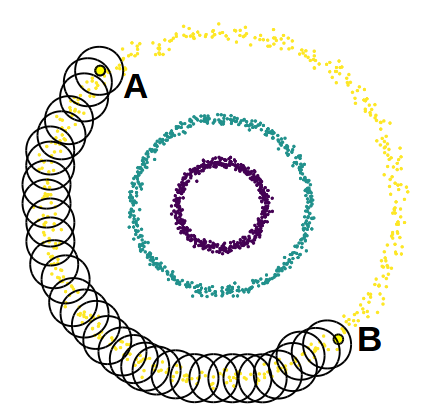

## 3.3 - Algorithme : 


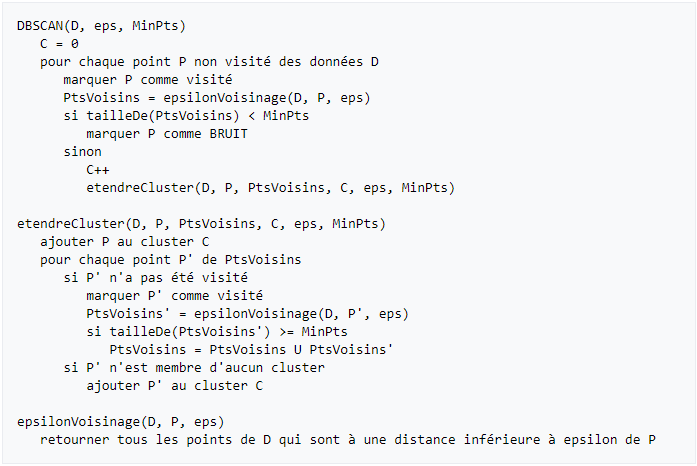

# 4 - Application de l'algorithme DBSCAN sur un jeu de données : 

### Import des librairies necessaires

Premièrement, nous importons les bibliothèques numpy, pyplot et sklearn .

In [5]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Depuis la librairie Scikit Learn, on a besoin de  DBSCAN. On le charge depuis le sous module module cluster de sklearn.

# Chargement des données

On genere un dataset.

In [6]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################

On peut afficher les données en exécutant chaque ligne individuellement.

In [7]:
#affichage des données, vous permet de mieux comprendre le jeu de données (optionnel) 
print(X)
print(labels_true)

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]
[0 1 0 2 0 1 1 2 0 0 1 1 1 2 1 0 1 1 2 2 2 2 2 2 1 1 2 0 0 2 0 1 1 0 1 0 2
 0 0 2 2 1 1 1 1 1 0 2 0 1 2 2 1 1 2 2 1 0 2 1 2 2 2 2 2 0 2 2 0 0 0 2 0 0
 2 1 0 1 0 2 1 1 0 0 0 0 1 2 1 2 2 0 1 0 1 0 1 1 0 0 2 1 2 0 2 2 2 2 0 0 0
 1 1 1 1 0 0 1 0 1 2 1 0 0 1 2 1 0 0 2 0 2 2 2 0 1 2 2 0 1 0 2 0 0 2 2 2 2
 1 0 2 1 1 2 2 2 0 1 0 1 0 1 0 2 2 1 1 2 2 1 0 1 2 2 2 1 1 2 2 0 1 2 0 0 2
 0 0 1 0 1 0 1 1 2 2 0 0 1 1 2 1 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0 1 1 1 2 2 2
 2 1 2 2 0 0 2 0 0 0 1 0 1 1 1 2 1 1 0 1 2 2 1 2 2 1 0 0 1 1 1 0 1 0 2 0 2
 0 2 2 2 1 1 0 0 1 1 0 0 2 1 2 2 1 1 2 1 2 0 2 2 0 1 2 2 0 2 2 0 0 2 0 2 0
 2 1 0 0 0 1 2 1 2 2 0 2 2 0 0 2 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 2 0 1 2 2
 0 0 2 0 2 1 0 2 0 2 0 2 2 0 1 0 1 0 2 2 1 1 1 2 0 2 0 2 1 2 2 0 1 0 1 0 0
 0 0 2 0 2 0 1 0 1 2 1 1 1 0 1 1 0 2 1 0 2 2 1 1 2 2 2 1 2 1 2 0 2 1 2 1 0
 1 0 1 

# Construction du modèle DBSCAN

Maintenant qu’on a mis les données dans le bon format (dans un Data Frame), l’entrainement de DBSCAN est facilité avec la librairie Scikit-Learn.

Il suffit d’instancier un objet de la classe DBSCAN en lui indiquant les valeurs eps et min_samples. 
Par la suite il faut appeler la méthode fit() pour calculer les clusters.

In [8]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

On affiche un a un les proprietes de l'objet db pour voire ceux qu'ils contiennent.

In [9]:
print(db.labels_)
print(db.core_sample_indices_)

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0  2  2  1  1  1  1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1 -1  1  0  2  1  1  0  0  0  0  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2  2  2  2 -1  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1 -1  2  1  1  2  2  2  0  1  0  1  0  1  0  2  2 -1  1  2
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2  2  2  2  0  2  0  2  2  0  2  2  2  0  0
  1  1  1  2  2  2  2  1  2  2  0  0  2  0  0  0  1  0  1  1  1  2  1  1
  0  1  2  2  1  2  2  1  0  0  1  1  1  0  1  0  2  0  2  2  2  2  2  1
  1  0  0  1  1  0  0  2  1 -1  2  1  1  2  1  2  0  2  2  0  1  2  2  0
  2  2  0  0  2  0  2  0  2  1  0  0  0  1  2  1  2  2  0  2  2  0  0  2
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  2

db.labels_ contient pour chaque element du dataset, le cluster associé . par exemple le premier et le troisieme element du dataset apartiennent au cluster "0", le deuxieme au cluster "1", le quatrieme au cluster "2".
les elements qui ont "-1" sont considérer comme du bruit.

db.core_sample_indices_ contient les indices des element qui sont considérer comme noyaux. c'est à dire les point qui ont au moins 10 (min_samples) voisins qui sont à une distance inférieure ou egale à 0.3 (eps).

allons voir les metrics

In [10]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


# Visualisez les résultats du classificateur

La lisgte db.labels_ nous fournit à quelle cluster appartient chaque élémént. Toutefois, une liste de la sorte n’est pas très parlante. Vu que notre jeu de données est relativement petit, on peut visualiser graphiquement notre jeu de données pour observer les clusters formés.

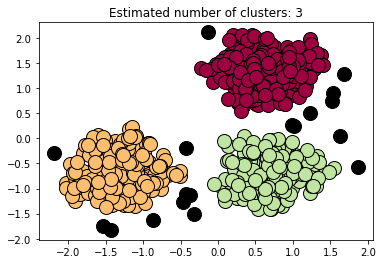

In [11]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    if k == -1:
        # affichage du bruit
        xy_b = X[class_member_mask]
        plt.plot(xy_b[:, 0], xy_b[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 5 - Conclusion : 

DBSCAN présente de grands avantages par rapport aux autres algorithmes de clustering : 

1 - Il n’exige pas du tout un nombre défini de clusters. 

2 - Il identifie les valeurs aberrantes comme des bruits différents du décalage moyen qui les jette simplement dans un cluster, même si le point de données est très différent. 

3 - Il est capable de trouver assez bien des clusters de taille et de forme arbitraire.


DBSCAN présente aussi des inconvénients  : 

1 - Il ne fonctionne pas aussi bien que d’autres lorsque les clusters ont une densité variable (le réglage du seuil de distance ε et de minPoints pour l’identification des points de voisinage varie d’un cluster à l’autre lorsque la densité varie). 

2 - Il n'est pas performant avec des données de très haute dimension car le seuil de distance ε devient difficile à estimer.

 